In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from pandas.plotting import parallel_coordinates
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Step 1: Loading the Wholesale customers dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

# Examine the structure of the dataset
data.head()


In [2]:
# Data exploration
# Checking the size of the dataset (number of rows and columns)
print("Dataset size:", data.shape, "\n")

# Displaying summary statistics of the dataset
print("Summary statistics:", "\n")
data.describe()

Dataset size: (440, 8) 

Summary statistics: 



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
# Step 2: Data preprocessing
# Check for missing values
print(data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
# Normalizing the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Converting the normalized data array back to a DataFrame
data_normalized = pd.DataFrame(normalized_data, columns=data.columns)

# Print the summary statistics of the normalized data
print("Summary statistics of normalized data:", "\n")
data_normalized.describe()


Summary statistics of normalized data: 



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Optimal number of clusters: 4


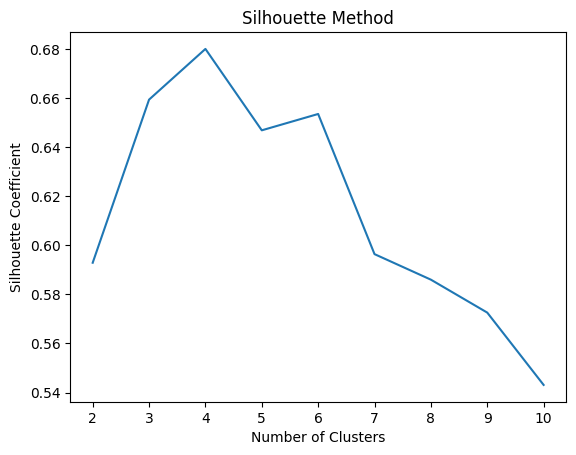

In [5]:
# Step 3: Finding the optimal number of clusters using the Silhouette coefficient
max_clusters = 10  # Maximum number of clusters to test
best_silhouette_score = -1
optimal_clusters = 2
silhouette_scores = []

for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_normalized)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_normalized, labels)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        optimal_clusters = k

print("Optimal number of clusters:", optimal_clusters)

# Plotting the silhouette scores for different numbers of clusters
plt.plot(range(2, max_clusters+1), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Method')
plt.show()


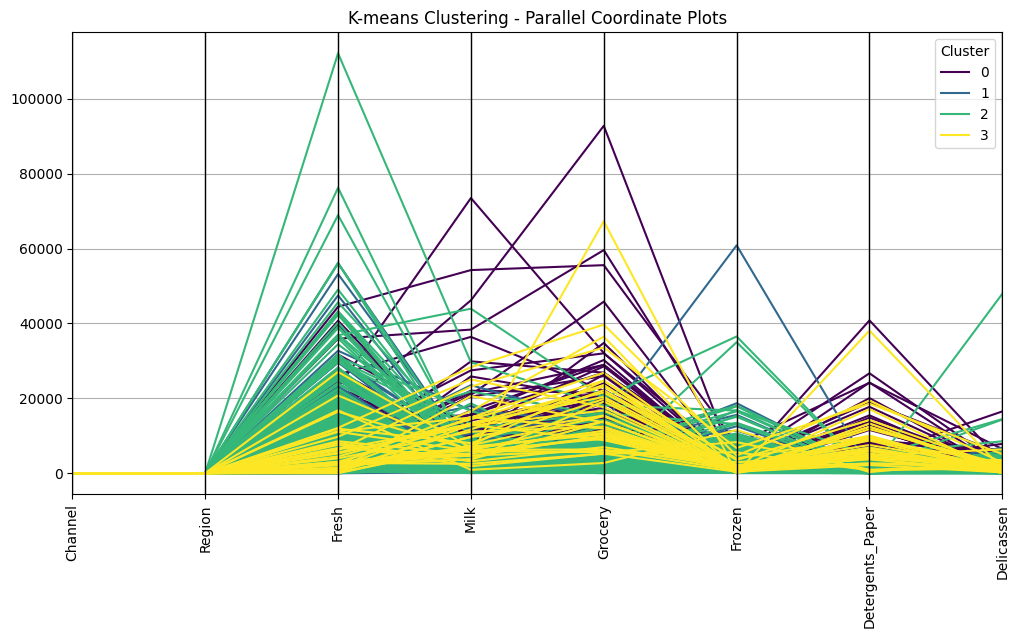

In [6]:
# Step 4: Applying the K-means clustering algorithm
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)

# Fit K-means to the preprocessed dataset
kmeans.fit(data_normalized)
labels = kmeans.labels_

# Visualize the results of the clustering algorithm
# Add the cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Normalize the cluster labels for better visualization
data['Cluster'] = data['Cluster'].astype('category').cat.codes

sorted_data = data.sort_values('Cluster')

# Plot parallel coordinate plots for all features
plt.figure(figsize=(12, 6))
parallel_coordinates(sorted_data, 'Cluster', colormap='viridis')
plt.xticks(rotation=90)
plt.title('K-means Clustering - Parallel Coordinate Plots')
plt.legend(title='Cluster')
plt.show()

In [7]:
# Step 5: Evaluating the quality of the clustering results

# Calculating the Silhouette Coefficient
silhouette_avg = silhouette_score(data_normalized, kmeans.labels_)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.679962733411163


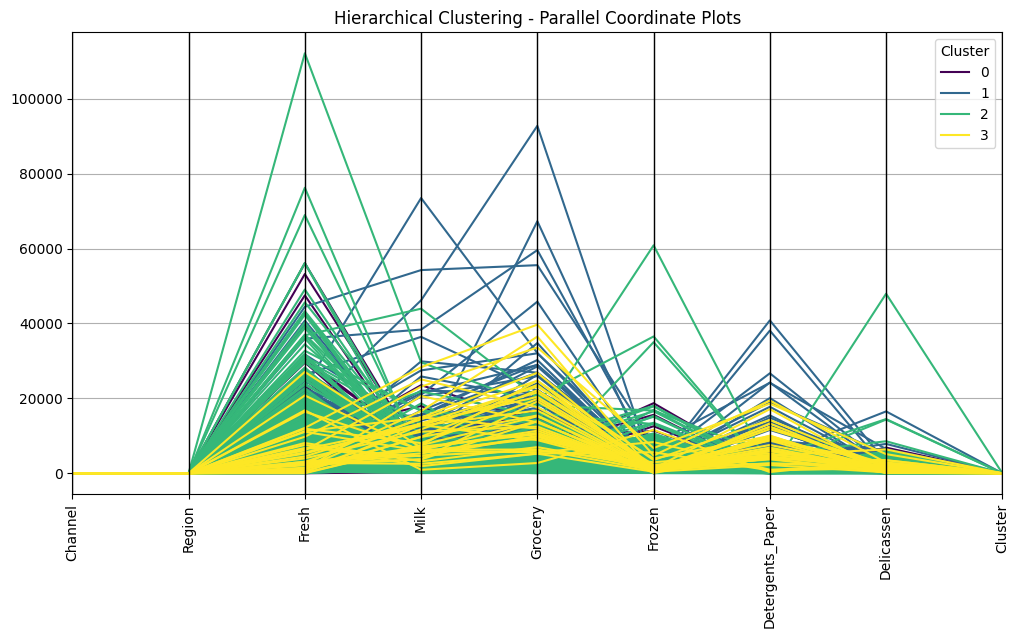

In [8]:
# Step 6: Applying hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical.fit(data_normalized)
hierarchical_labels = hierarchical.labels_

# Add hierarchical cluster labels to the original DataFrame
data['Hierarchical_Cluster'] = hierarchical_labels

# Normalize the hierarchical cluster labels for better visualization
data['Hierarchical_Cluster'] = data['Hierarchical_Cluster'].astype('category').cat.codes

# Plot parallel coordinate plots for all features based on hierarchical clustering
plt.figure(figsize=(12, 6))
parallel_coordinates(data.sort_values('Hierarchical_Cluster'), 'Hierarchical_Cluster', colormap='viridis')
plt.xticks(rotation=90)
plt.title('Hierarchical Clustering - Parallel Coordinate Plots')
plt.legend(title='Cluster')
plt.show()


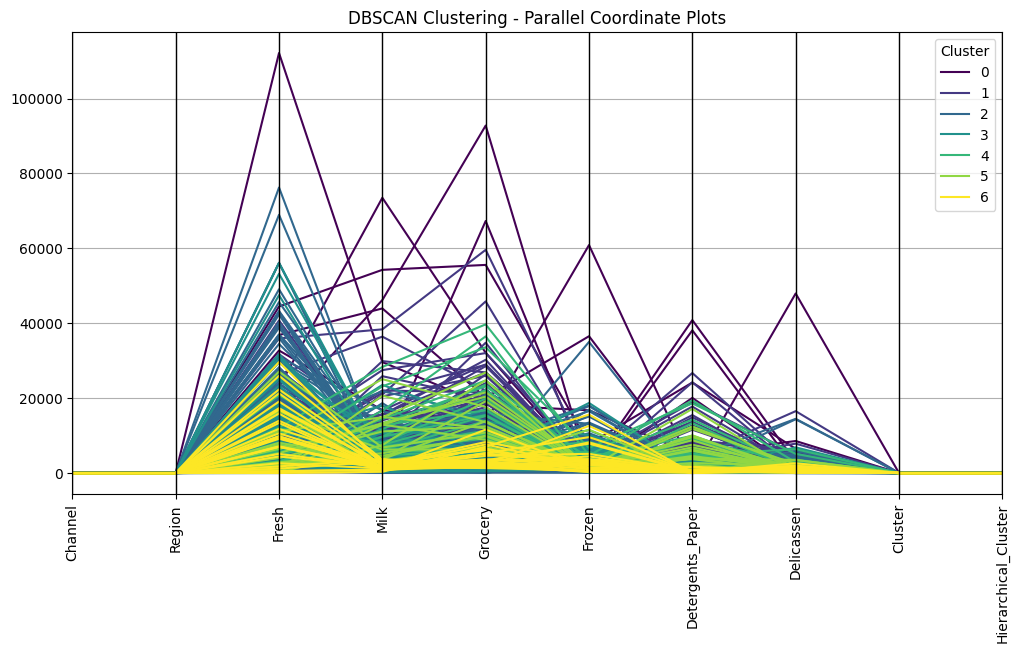

In [10]:
# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_normalized)
dbscan_labels = dbscan.labels_

# Add DBSCAN cluster labels to the original DataFrame
data['DBSCAN_Cluster'] = dbscan_labels

# Normalize the DBSCAN cluster labels for better visualization
data['DBSCAN_Cluster'] = data['DBSCAN_Cluster'].astype('category').cat.codes

# Plot parallel coordinate plots for all features based on DBSCAN clustering
plt.figure(figsize=(12, 6))
parallel_coordinates(data.sort_values('DBSCAN_Cluster'), 'DBSCAN_Cluster', colormap='viridis')
plt.xticks(rotation=90)
plt.title('DBSCAN Clustering - Parallel Coordinate Plots')
plt.legend(title='Cluster')
plt.show()


In [14]:
# Step 7: Evaluating the quality of the clustering results

# Calculating the Silhouette Coefficient of Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(data_normalized, hierarchical_labels)
print("Silhouette Coefficient (Hierarchical Clustering):", silhouette_avg_hierarchical)

# Calculating the Silhouette Coefficient of DBSCAN
silhouette_avg_dbscan = silhouette_score(data_normalized, dbscan_labels)
print("Silhouette Coefficient (DBSCAN):", silhouette_avg_dbscan)


Silhouette Coefficient (Hierarchical Clustering): 0.6779590999021476
Silhouette Coefficient (DBSCAN): 0.6360287841835186
